In [6]:
# Import all the necessary libraries
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.layers import Dropout, MaxPool2D, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools
from tensorflow.keras.models import load_model
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [11]:
# Define the path to our image database
train_path = 'E:\Docs\Academic\IronHack\Projects\Project-Week-8-Travelling-With-Wheelchair/images/train/'
valid_path = 'E:\Docs\Academic\IronHack\Projects\Project-Week-8-Travelling-With-Wheelchair/images/valid/'
test_path = 'E:\Docs\Academic\IronHack\Projects\Project-Week-8-Travelling-With-Wheelchair/images/test/'

In [12]:
# Generate the subsets with the train, validation and test images
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(train_path, target_size = (400,400), classes = ['ramp', 'no_ramp'], batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(valid_path, target_size = (400,400), classes = ['ramp', 'no_ramp'], batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(test_path, target_size = (400,400), classes = ['ramp', 'no_ramp'], batch_size = 10)

Found 1499 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


### We build a basic model to understand how it works

In [4]:
# Generate the model and its layers
model = Sequential([
    Conv2D(filters=32, kernel_size = (3,3), activation='relu', padding='same', input_shape=(400,400,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size = (3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [5]:
# Check the main information about our model: layers, data entries, parameters...
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 400, 400, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1280002   
Total params: 1,299,394
Trainable params: 1,299,394
Non-trainable params: 0
____________________________________________

In [6]:
# Compile our model setting the optimizer function and our loss parameter
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model with the train_batches and check its accuracy with the valid_batches
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2, steps_per_epoch=12)

Epoch 1/5
 - 13s - loss: 89.8498 - accuracy: 0.8000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/5
 - 12s - loss: 11.4935 - accuracy: 0.9167 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
 - 12s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
 - 12s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
 - 12s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


### We try with a more complex model (ResNet50)

In [6]:
# Import the keras module with the model
from keras import applications

In [7]:
# Define it into a variable
resnet_model = applications.resnet50.ResNet50(weights=None, include_top=False, input_shape=(400,400,3))

C:\Users\ppaau\anaconda3\envs\Final_project\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [8]:
# Define the parameters for the model
num_classes=2
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.35)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model1 = Model(inputs = resnet_model.input, outputs = predictions)

In [9]:
# Import the optimizer
from keras.optimizers import SGD, Adam
adam = Adam()
model1.compile(optimizer=adam, loss='categorical_crossentropy')

In [11]:
# Train the model
model1.fit(train_batches, validation_data=valid_batches, epochs=5)

Epoch 1/5
150/150 [==============================] - 10909s 73s/step - loss: 0.6383 - val_loss: 65.6429
Epoch 2/5
150/150 [==============================] - 11830s 79s/step - loss: 0.4422 - val_loss: 12.9355
Epoch 3/5
150/150 [==============================] - 11543s 77s/step - loss: 0.3661 - val_loss: 11.2104
Epoch 4/5
150/150 [==============================] - 11231s 75s/step - loss: 0.3131 - val_loss: 0.3311
Epoch 5/5
150/150 [==============================] - 11300s 75s/step - loss: 0.2840 - val_loss: 1.2341


In [12]:
# Save the trained model
model1.save('resnet50model.h5')

In [7]:
model1 = load_model('../resnet50model.h5')

In [13]:
# Store the predictions into a variable
predictions = model1.predict(x=test_batches, verbose=0)

In [14]:
# Take the predicted class by rounding the predicted probability 
np.argmax(np.round(predictions), axis=1)

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [17]:
# Create the confusion matrix
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1))

In [21]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[58 67]
 [66 59]]


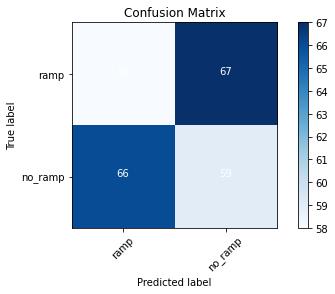

In [22]:
# Plot the confusion matrix
cm_plot_labels = ['ramp', 'no_ramp']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')